<a href="https://colab.research.google.com/github/Bibek04-bit/Flood-Forecasting/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from zlib import crc32

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
path_to_file = '/content/Flood_data_linear_reg.csv'
df = pd.read_csv(path_to_file)
print(df.head())

         Date  Daily flow Rate  Gauge height flow      NDVI  sm_top_0_10cm  \
0  2010-01-01              401               3.19  0.806800         12.728   
1  2010-01-02              397               3.18  0.805588         12.628   
2  2010-01-03              395               3.17  0.804375         12.533   
3  2010-01-04              390               3.16  0.803163         12.444   
4  2010-01-05              392               3.17  0.801950         12.356   

   sm_10_40cm  24h accumulated  Daily Max Temp  Daily Min Temp  Flood_Level  
0   41.205952              0.1            14.0             8.0            0  
1   40.953522              1.8            14.4            10.8            0  
2   40.707092              1.6            18.0            10.4            0  
3   40.467663              0.0            19.5             9.5            0  
4   40.249233              0.0            20.5            10.0            0  


In [9]:
df = df.dropna()
if 'Date' in df.columns:
  df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3652 non-null   datetime64[ns]
 1   Daily flow Rate    3652 non-null   int64         
 2   Gauge height flow  3652 non-null   float64       
 3   NDVI               3652 non-null   float64       
 4   sm_top_0_10cm      3652 non-null   float64       
 5   sm_10_40cm         3652 non-null   float64       
 6   24h accumulated    3652 non-null   float64       
 7   Daily Max Temp     3652 non-null   float64       
 8   Daily Min Temp     3652 non-null   float64       
 9   Flood_Level        3652 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 285.4 KB


In [13]:
df["id"] = df["Date"].factorize()[0]

In [14]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
train_set, test_set = split_data_with_id_hash(df, 0.2, "id")
print("Train size:", len(train_set), "Test size:", len(test_set))

Train size: 2922 Test size: 730


In [16]:
features = ['Daily flow Rate','Gauge height flow', 'NDVI', 'sm_top_0_10cm', 'sm_10_40cm', '24h accumulated', 'Daily Max Temp', 'Daily Min Temp']

x = df[features]
y = df['Flood_Level']

In [18]:
X_train = train_set[features].copy()
y_train = train_set['Flood_Level'].copy()
X_test = test_set[features].copy()
y_test = test_set['Flood_Level'].copy()

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = lin_reg.predict(X_test_scaled)


In [22]:
print(lin_reg.intercept_)
print(lin_reg.coef_)


0.19917864476386035
[ 0.32487903  0.0697507  -0.00730443 -0.0295427   0.00883176 -0.00394767
  0.05599851 -0.02622819]


In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [24]:
print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Model Performance:
RMSE: 0.17
R² Score: 0.827


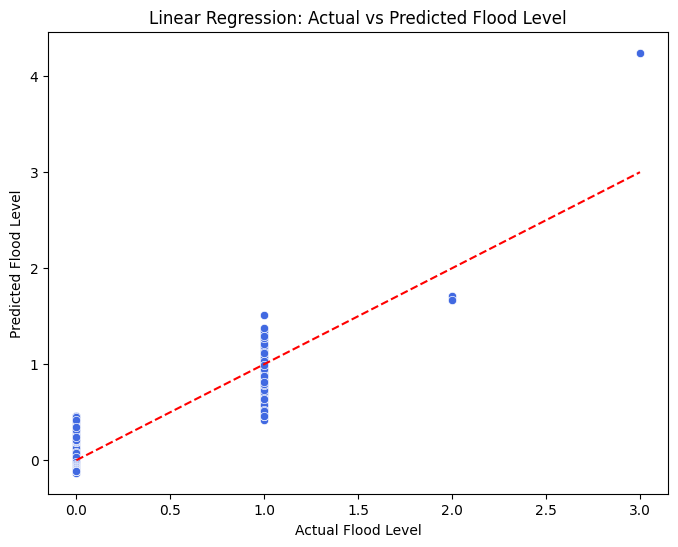

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue")
plt.xlabel("Actual Flood Level")
plt.ylabel("Predicted Flood Level")
plt.title("Linear Regression: Actual vs Predicted Flood Level")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

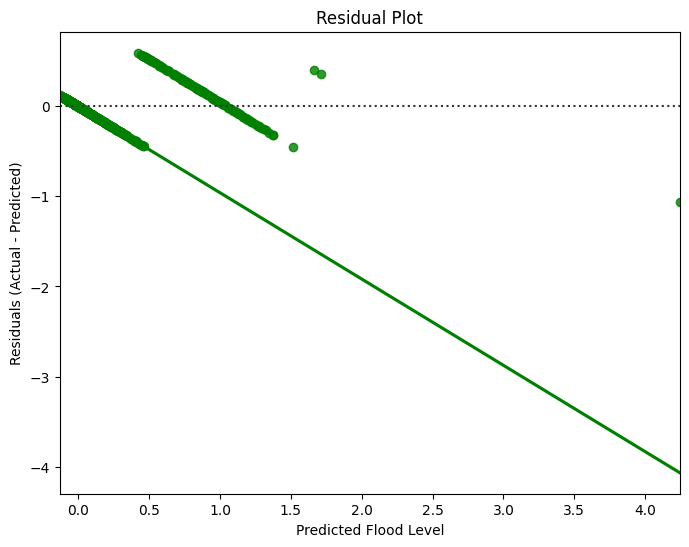

In [26]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, color="green", lowess=True)
plt.xlabel("Predicted Flood Level")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [27]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lin_reg.coef_
})
print("\nModel Coefficients:")
print(coeff_df)


Model Coefficients:
             Feature  Coefficient
0    Daily flow Rate     0.324879
1  Gauge height flow     0.069751
2               NDVI    -0.007304
3      sm_top_0_10cm    -0.029543
4         sm_10_40cm     0.008832
5    24h accumulated    -0.003948
6     Daily Max Temp     0.055999
7     Daily Min Temp    -0.026228


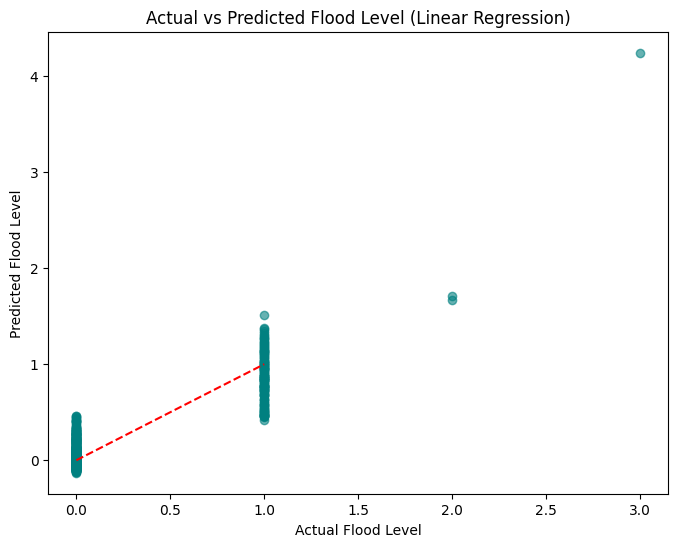

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Flood Level")
plt.ylabel("Predicted Flood Level")
plt.title("Actual vs Predicted Flood Level (Linear Regression)")
plt.plot([0, 1], [0, 1], 'r--')  # Perfect prediction line
plt.show()
